In [1]:
import pandas as pd
import numpy as np
name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df=pd.read_csv('housing 4.csv',names=name,delim_whitespace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


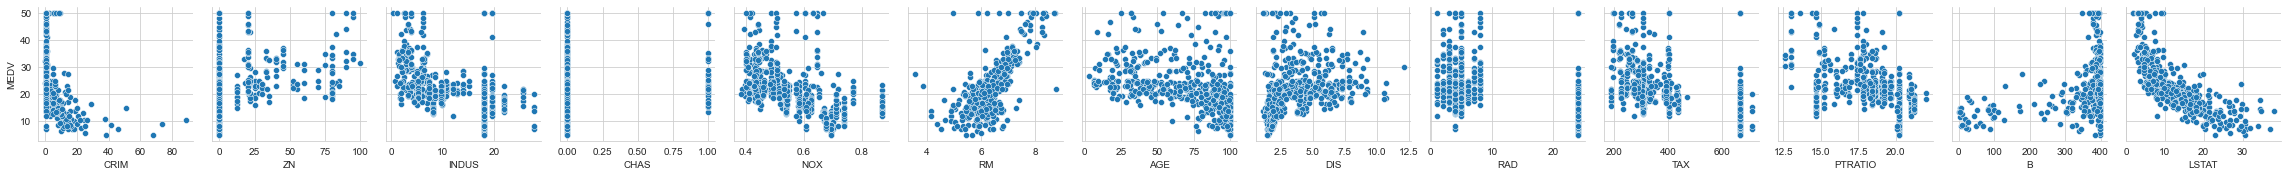

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
x_vars=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
y_vars=["MEDV"]
g=sns.PairGrid(df,x_vars=x_vars,y_vars=y_vars)
g.map_offdiag(sns.scatterplot)
plt.show(g)

In [8]:
df.corr().MEDV

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [11]:
df.shape

(506, 14)

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
#split data into x and y
x=df.iloc[:,:13]
y=df.iloc[:,13]
print(x.shape,y.shape)

(506, 13) (506,)


# Linear Regression

In [12]:
#linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)
l_reg=LinearRegression()
l_reg.fit(x_train,y_train)
y_pred=l_reg.predict(x_test)
l_reg.score(x_test,y_test)

0.7952617563243858

In [13]:
#mean absolute error
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test,y_pred)
mae

3.014250275240336

In [14]:
#coefficient & intercept
print(l_reg.coef_)
print(l_reg.intercept_)

[-1.23897571e-01  4.81822924e-02 -4.74497796e-02  3.36938950e+00
 -1.56635488e+01  3.59419367e+00 -9.33206067e-03 -1.47089101e+00
  3.05053544e-01 -1.08397039e-02 -9.08791339e-01  1.00352939e-02
 -4.77714677e-01]
35.8616833450358


In [16]:
#cross validation - mean absolute error
from sklearn.model_selection import cross_val_score
score=cross_val_score(l_reg,x,y,cv=5,scoring="neg_mean_absolute_error")
print(score)
score.mean()

[-2.62190565 -3.90725478 -4.386606   -5.57073637 -4.76333993]


-4.249968544192527

## Ridge Regression

Linear Regression test score: 0.7334492147453113
Ridge Regression test score low alpha: 0.7322942065880892
Ridge Regression test score high alpha: 0.6619614923620794


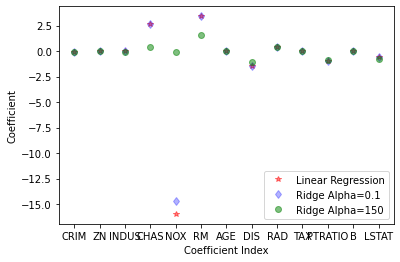

In [36]:
#compare
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
lr=LinearRegression()
lr.fit(x_train,y_train)

rr=Ridge(alpha=0.1)
rr.fit(x_train,y_train)

rr150=Ridge(alpha=150)
rr150.fit(x_train,y_train)

test_score=lr.score(x_test,y_test)
rr_test_score=rr.score(x_test,y_test)
rr150_test_score=rr150.score(x_test,y_test)
print("Linear Regression test score:",test_score)
print("Ridge Regression test score low alpha:",rr_test_score)
print("Ridge Regression test score high alpha:", rr150_test_score)

plt.plot(name[:13],lr.coef_,alpha=0.5,marker='*',linestyle='none',color='red',label='Linear Regression')
plt.plot(name[:13],rr.coef_,alpha=0.3,marker='d',linestyle='none',color='blue',label='Ridge Alpha=0.1')
plt.plot(name[:13],rr150.coef_,alpha=0.5,marker='o',linestyle='none',color='green',label='Ridge Alpha=150')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient')
plt.legend()
plt.show()

In [20]:
#find the best hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
param_grid={'alpha':np.arange(0,5,50)}
ridge=Ridge()
ridge_cv=GridSearchCV(ridge,param_grid,cv=5)
ridge_cv.fit(x,y)
print(ridge_cv.best_params_)
print(ridge_cv.best_score_)

{'alpha': 0}
0.35327592439588196


In [37]:
rr.coef_

array([-1.30332423e-01,  4.96882992e-02, -4.27062515e-03,  2.67479025e+00,
       -1.46670401e+01,  3.41819613e+00,  2.07057363e-04, -1.47358283e+00,
        3.61713403e-01, -1.32943601e-02, -9.39603394e-01,  1.17917246e-02,
       -5.96453110e-01])

## Lasso Regression

In [41]:
from sklearn.linear_model import Lasso
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.3,random_state=9)
lasso=Lasso(alpha=0.9)
lasso.fit(x_train,y_train)
y_pred=lasso.predict(x_test)
lasso.score(x_test,y_test)

0.6708919267911748

In [58]:
#mean absolute error
mae=metrics.mean_absolute_error(y_test,y_pred)
print("mean absolute error:", mae)

score=cross_val_score(lasso,x,y,cv=5,scoring='neg_mean_absolute_error')
print("negative mean absolute errors (CV) are:"+str(score))
print("the average cv score is:{}".format(np.mean(score)))

mean absolute error: 3.6708770325187325
negative mean absolute errors (CV) are:[-2.95755123 -4.02651522 -5.11606802 -4.96406282 -3.48661767]
the average cv score is:-4.110162991817538


In [59]:
lasso.coef_

array([-0.00554627,  0.05612309, -0.09225354,  0.        , -0.        ,
        1.57672   ,  0.01132655, -0.90776463,  0.30894918, -0.01824599,
       -0.83266791,  0.0099062 , -0.69790523])

In [62]:
#find the best hyperparameter
param_grid={'alpha':np.arange(0,5,50)}
lasso_cv=GridSearchCV(lasso,param_grid,cv=5)
lasso_cv.fit(x,y)
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)
                              

{'alpha': 0}
0.3532759243958813


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4967.024500395999, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

imp=SimpleImputer(missing_values=np.nan,strategy='mean')
lr=LinearRegression()
pipeline=Pipeline([('imputation',imp),('scaler',StandardScaler()),('predict',lr)])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
lr_model=pipeline.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)
lr_model.score(x_test,y_test)

0.7789207451814417

In [5]:
np.mean(abs(y_pred-y_test))

3.113043746893428

In [7]:
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test,y_pred)
print("mean absolute error:", mae)

mean absolute error: 3.1130437468934273


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

features=x.columns.tolist()
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
pipeline=Pipeline([('imp',imp),('stdscaler',StandardScaler())])
preprocessor=ColumnTransformer(transformers=[('all',pipeline,features)])
x_processed=preprocessor.fit_transform(x)

lr=LinearRegression()
score=cross_val_score(lr,x_preprocessed,y,cv=5,scoring='neg_mean_absolute_error')
print(score.mean())

x_train,x_test,y_train,y_test=train_test_split(x_processed,y,test_size=0.2,random_state=5)
lr_model=lr.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)
lr_model.score(x_test,y_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
print("mean absolute error:", mae)

-4.249968544192518
mean absolute error: 3.2132704958423823


In [17]:
x_processed

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])